# Housing Prices Problem

The goal of this notebook is to use regression to predict house prices based on several variables. 

Data set avalable here: https://www.kaggle.com/harlfoxem/housesalesprediction#kc_house_data.csv

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# read the data
df = pd.read_csv('input/kc_house_data.csv', parse_dates = ["date"])

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


Columns "id" and "date" don't have any meaning in relation to the sale price, let's drop them.

In [5]:
df = df.drop(['id', 'date'],axis=1)

In [6]:
X = df.drop("price", axis=1)

In [7]:
y = df.price

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


##### From inspection of data we can conclude that:

1. Average price for a house  is 540 088\\$, maximum price is 7 700 000\\$
2. Average number of bedrooms is 3.3 and bathrooms - 2.2, there is one house with 33 bedrooms
3. Average lot size is 15 107 sqft
4. And average living space is 2 079 sqft

Time to do some data inspection to get a feeling of data set.

In [9]:
# Check if data contains null values
#df.isnull().sum()

The data is clean, there are no null values.

The numbers below show, that there are 9 824 houses with 3 bedrooms, 6882 houses with 4 bedrooms, one house with 11 and one with 33 bedrooms.

In [10]:
X["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

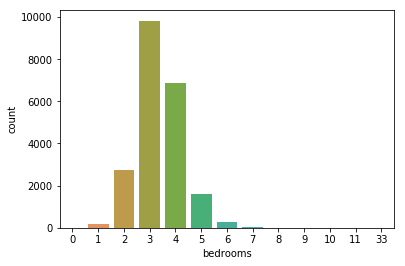

In [11]:
X['bedrooms'].value_counts().sort_index(inplace=True)
sns.countplot(X.bedrooms);

There are 163 houses, which have a view to waterfront:

In [12]:
X['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [13]:
X['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

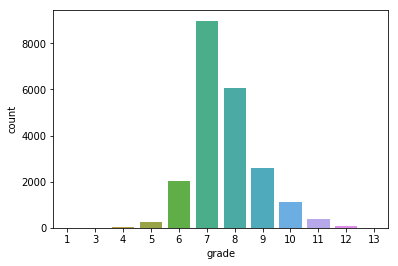

In [14]:
X['grade'].value_counts().sort_index(inplace=True)
sns.countplot(X.grade);

### Plot correlation heatmap to see which features correlate with each other

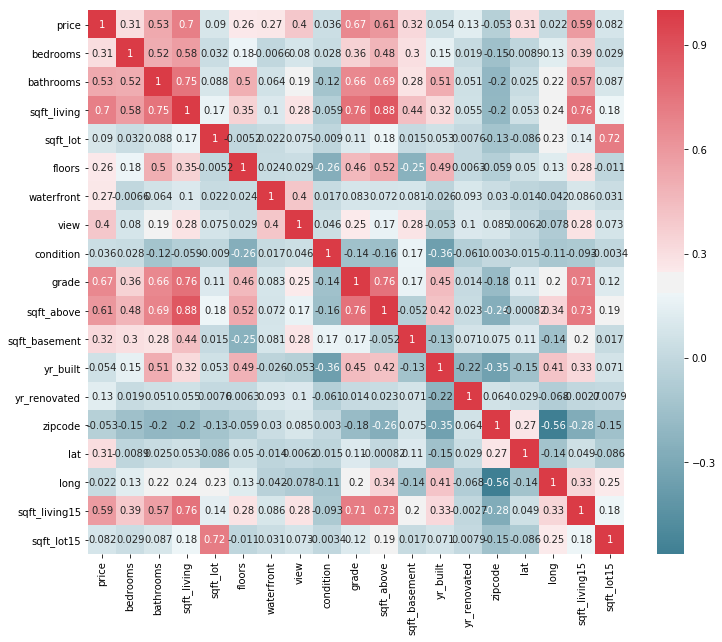

In [15]:
 _, ax = plt.subplots(figsize = (12, 10))
    
colormap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(df.corr(), annot=True, cmap = colormap);

Based on the analysis of the above correlation matrix, we can see that __price__ strongly correlates with __sqft_living__, __bathrooms__ and __grade__.

For now I'll use linear regression with just one variable to determine the price.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = np.array(X_train["sqft_living"]).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test["sqft_living"]).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

In [18]:
print ("Linear regression with one variable")
print ("Mean squared error:", round(rmse, 2))
print('R-squared (training) ', round(lr.score(X_train, y_train), 3))
print('R-squared (testing) ', round(lr.score(X_test, y_test), 3))

Linear regression with one variable
Mean squared error: 266433.43
R-squared (training)  0.492
R-squared (testing)  0.494


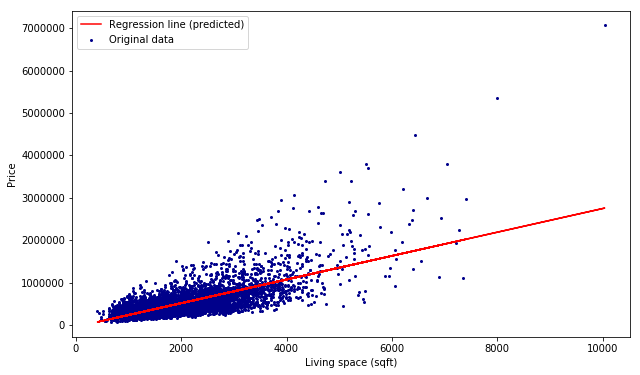

In [19]:
_, ax = plt.subplots(figsize= (10, 6))
plt.scatter(X_test, y_test, color= 'darkblue', label = 'Original data', s=4)
plt.plot(X_test, lr.predict(X_test), color='red', label= 'Regression line (predicted)')
plt.xlabel('Living space (sqft)')
plt.ylabel('Price')
plt.legend();

## The results of regression with one variable are quite poor, let's try using several variables

Variables that are highly correlated with price are, as we have found out earlier: __bathrooms__ and __grade__.

In [20]:
features = ["sqft_living", "bathrooms", "grade"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
lr_multi = LinearRegression()
lr_multi.fit(X_train[features], y_train)
pred_multi = lr_multi.predict(X_test[features])
rmse_multi = np.sqrt(metrics.mean_squared_error(y_test, pred_multi))

In [23]:
print ("Linear regression with 3 variables")
print ("Mean squared error:", round(rmse_multi, 2))
print('R-squared (training) ', round(lr_multi.score(X_train[features], y_train), 3))
print('R-squared (testing) ', round(lr_multi.score(X_test[features], y_test), 3))

Linear regression with 3 variables
Mean squared error: 247104.38
R-squared (training)  0.532
R-squared (testing)  0.553


## The results with 3 features are somewhat better. Let's add more varibles

In [24]:
corr_coefficients = df.corr().price.sort_values(ascending=False)

In [25]:
corr_coefficients

price            1.000
sqft_living      0.702
grade            0.667
sqft_above       0.606
sqft_living15    0.585
bathrooms        0.525
view             0.397
sqft_basement    0.324
bedrooms         0.308
lat              0.307
waterfront       0.266
floors           0.257
yr_renovated     0.126
sqft_lot         0.090
sqft_lot15       0.082
yr_built         0.054
condition        0.036
long             0.022
zipcode         -0.053
Name: price, dtype: float64

In [26]:
# first coefficient (index 0) is the price, we need to exclude it
features = corr_coefficients.index[1:12].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
lr_multi = LinearRegression()
lr_multi.fit(X_train[features], y_train)
pred_multi = lr_multi.predict(X_test[features])
rmse_multi = np.sqrt(metrics.mean_squared_error(y_test, pred_multi))

In [29]:
print ("Linear regression with 11 variables")
print ("Mean squared error:", round(rmse_multi, 2))
print('R-squared (training) ', round(lr_multi.score(X_train[features], y_train), 3))
print('R-squared (testing) ', round(lr_multi.score(X_test[features], y_test), 3))

Linear regression with 11 variables
Mean squared error: 211428.62
R-squared (training)  0.656
R-squared (testing)  0.663


## Try another model: RandomForest

In [30]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train[features], y_train)
pred_for = rand_for.predict(X_test[features])
rmse_for = np.sqrt(metrics.mean_squared_error(y_test, pred_for))

In [31]:
print ("Random forest with 11 variables")
print ("Mean squared error:", round(rmse_for, 2))
print('R-squared (training) ', round(rand_for.score(X_train[features], y_train), 3))
print('R-squared (testing) ', round(rand_for.score(X_test[features], y_test), 3))

Random forest with 11 variables
Mean squared error: 183939.31
R-squared (training)  0.964
R-squared (testing)  0.745


### Conclusion:

After testing several models: linear regression with one and several variables and random forest, we conclude that random forest model is the best solution here, as it gives best testing score (0.757).